**Hill climbing search**



In [11]:
def metricna_dimenzija(G):
    n = G.num_verts()
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum(x[i] for i in G))
    for u, v in Combinations(G, 2):
        p.add_constraint(sum(x[i] for i in G if razdalje[u].get(i, n) != razdalje[v].get(i, n)) >= 1)

    p.solve()
    razlocujoca_mnozica = [i for i in G if round(p.get_values(x[i])) == 1]

    return len(razlocujoca_mnozica)

In [12]:
def na_napake_odporna_metricna_dimenzija(G):
    n = G.num_verts() # izračunam število vozlišč grafa G
    razdalje = G.distance_all_pairs() # matrika razdalj med vsakim parom vozlišč iz G

    # inicializacija CLP:
    p = MixedIntegerLinearProgram(maximization = False) # minimizacija
    x = p.new_variable(binary = True) # ustvarjanje binarne spremenljivke za uporabo znotraj CLP p
    p.set_objective(sum(x[i] for i in G))
    # pogoj: vsak par (u, v) ima vsaj dve razločujoči vozlišči v S:
    for u, v in Combinations(G, 2):
        p.add_constraint(sum(x[i] for i in G if razdalje[u].get(i, n) != razdalje[v].get(i, n)) >= 2)

    # reševanje CLP:
    p.solve()
    na_napake_odporna_razlocujoca_mnozica = [i for i in G if round(p.get_values(x[i])) == 1]

    # vrnemo kardinalnost = moč razločujoče množice:
    return len(na_napake_odporna_razlocujoca_mnozica)

Pri meta hevrističnem pristopu, potrebujemo še kodo, ki bo začetnemu grafu dodala oziroma odvzela neko povezavo. S tem bomo graf nekoliko spremenili.


In [13]:
from sage.all import *
import random
import matplotlib.pyplot as plt

def tweak_graf(G):
    povezave = list(G.edges(labels=False))
    if random.random() < 0.5 and povezave:
        # Izbrišemo naključno povezavo
        G.delete_edge(random.choice(povezave))
    else:
        # Dodao naključno povezavo
        u, v = random.sample(range(G.num_verts()), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)

In [14]:
def hill_climbing(ciljna_dim, ciljna_ftdim, st_vozlisc, max_iteracij=1000):
    # generiramo prvotni graf
    trenutni_graf = graphs.CompleteGraph(st_vozlisc)
    trenutna_dim = metricna_dimenzija(trenutni_graf)
    trenutna_ftdim = na_napake_odporna_metricna_dimenzija(trenutni_graf)

    if trenutna_dim == ciljna_dim and trenutna_ftdim == ciljna_ftdim:
        return trenutni_graf.show(), trenutna_dim, trenutna_ftdim

    for iteracija in range(max_iteracij):
        # naredimo kopijo in prilagodimo graf
        nov_graf = trenutni_graf.copy()
        tweak_graf(nov_graf)

        # ocenimo nov graf
        nova_dim = metricna_dimenzija(nov_graf)
        nova_ftdim = na_napake_odporna_metricna_dimenzija(nov_graf)

        # če je boljši, ga sprejmemo
        if nova_dim == ciljna_dim and nova_ftdim == ciljna_ftdim:
            return nov_graf, nova_dim, nova_ftdim
        elif abs(nova_dim - ciljna_dim) + abs(nova_ftdim - ciljna_ftdim) < abs(trenutna_dim - ciljna_dim) + abs(trenutna_ftdim - ciljna_ftdim):
            trenutni_graf = nov_graf
            trenutna_dim = nova_dim
            trenutna_ftdim = nova_ftdim

    return trenutni_graf.show(), trenutna_dim, trenutna_ftdim

Funkcijo hill\_climbing poženemo na različnih grafih, kjer spreminjamo tudi na napako odporno metrično dolžino.


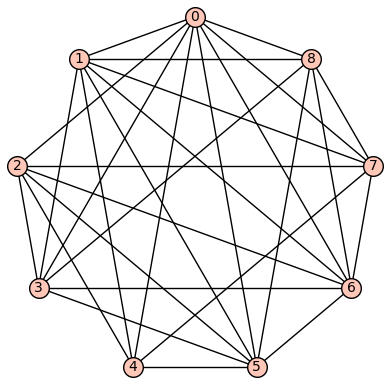

(None, 3, 6)

In [15]:
hill_climbing(2, 4, 9)

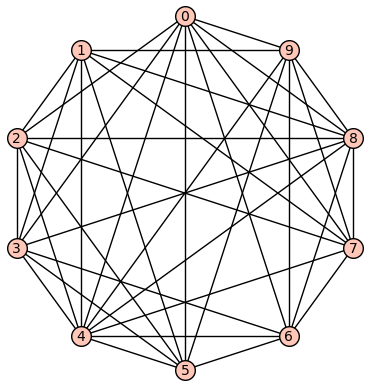

(None, 4, 6)

In [16]:
hill_climbing(2, 4, 10)

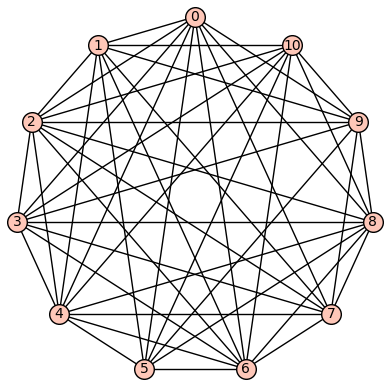

(None, 4, 7)

In [17]:
hill_climbing(2, 4, 11)

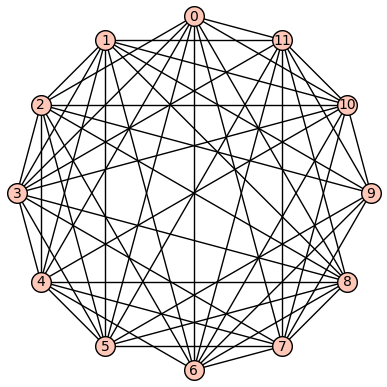

(None, 4, 6)

In [18]:
hill_climbing(2, 4, 12)

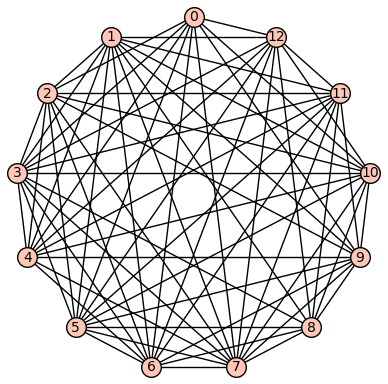

(None, 5, 8)

In [19]:
hill_climbing(2, 4, 13)

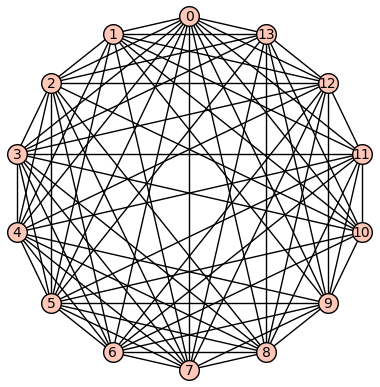

(None, 5, 7)

In [20]:
hill_climbing(2, 4, 14)

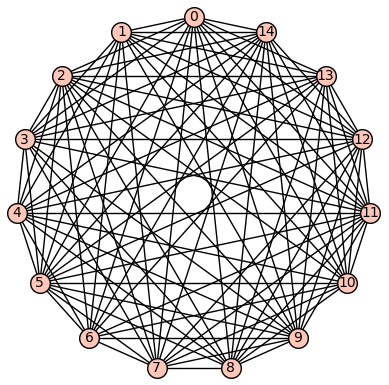

(None, 6, 10)

In [21]:
hill_climbing(2, 4, 15)

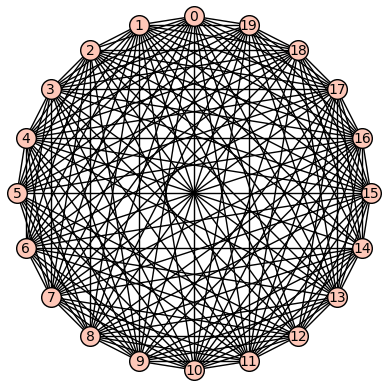

(None, 8, 13)

In [22]:
hill_climbing(2, 4, 20)

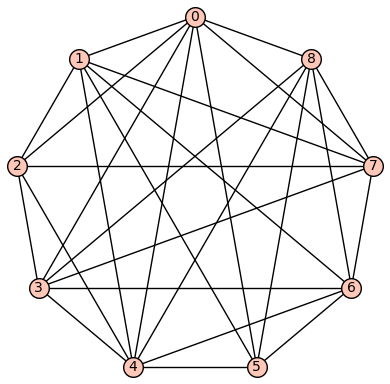

(None, 3, 5)

In [23]:
hill_climbing(2, 5, 9)

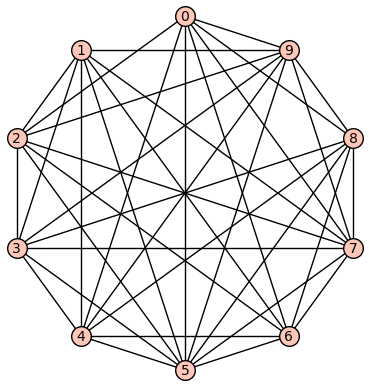

(None, 4, 6)

In [24]:
hill_climbing(2, 5, 10)

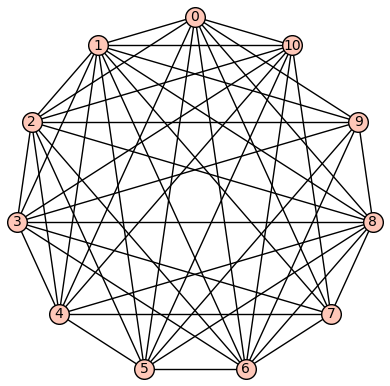

(None, 4, 7)

In [25]:
hill_climbing(2, 5, 11)

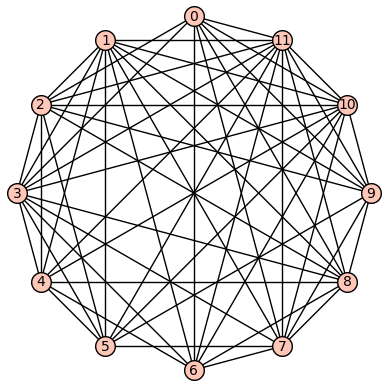

(None, 4, 7)

In [26]:
hill_climbing(2, 5, 12)

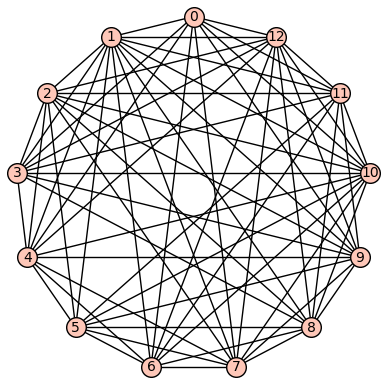

(None, 5, 7)

In [27]:
hill_climbing(2, 5, 13)

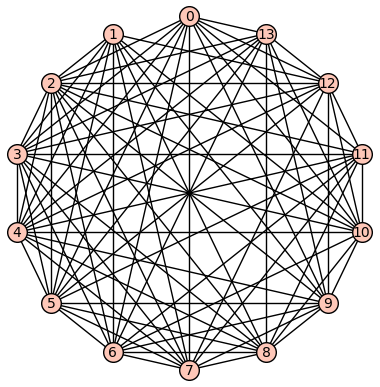

(None, 5, 8)

In [28]:
hill_climbing(2, 5, 14)

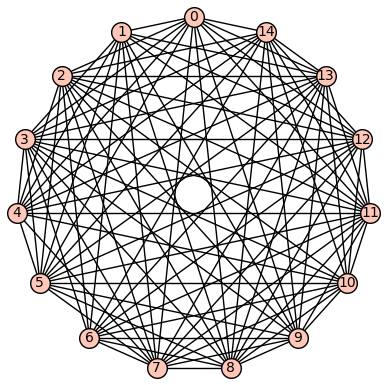

(None, 6, 9)

In [29]:
hill_climbing(2, 5, 15)

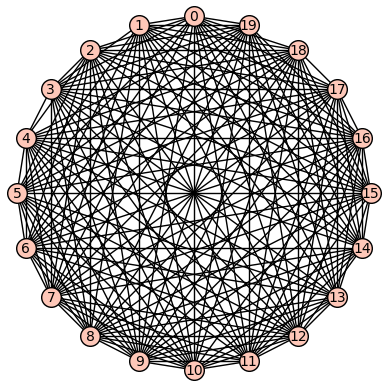

(None, 8, 12)

In [30]:
hill_climbing(2, 5, 20)

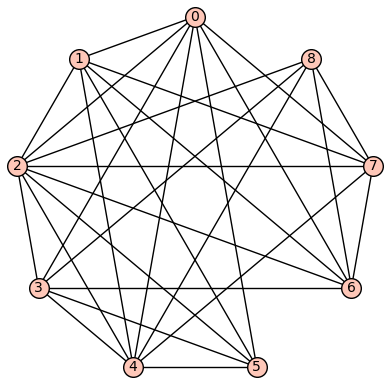

(None, 3, 6)

In [31]:
hill_climbing(2, 6, 9)

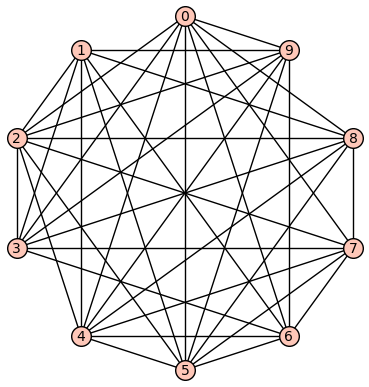

(None, 4, 6)

In [32]:
hill_climbing(2, 6, 10)

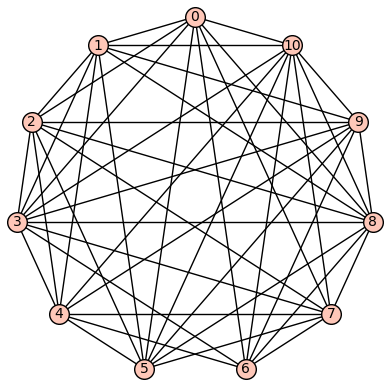

(None, 4, 6)

In [33]:
hill_climbing(2, 6, 11)

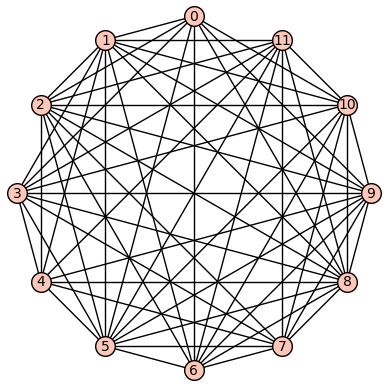

(None, 5, 8)

In [34]:
hill_climbing(2, 6, 12)

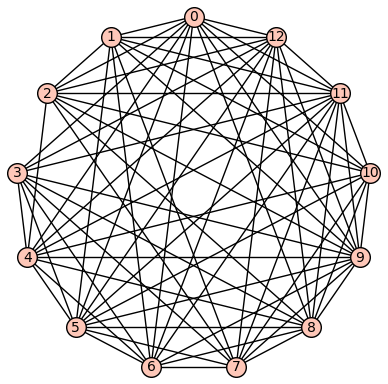

(None, 5, 8)

In [35]:
hill_climbing(2, 6, 13)

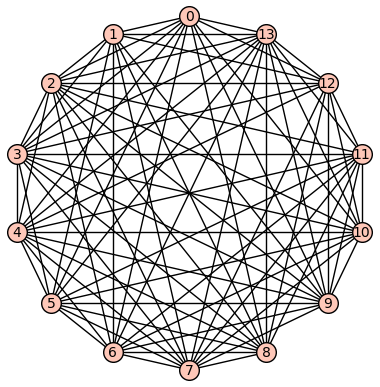

(None, 5, 9)

In [36]:
hill_climbing(2, 6, 14)

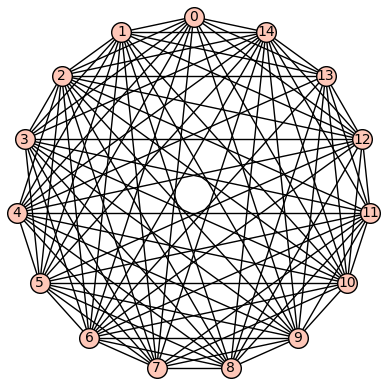

(None, 6, 10)

In [37]:
hill_climbing(2, 6, 15)

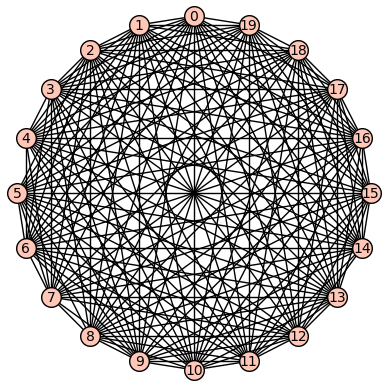

(None, 8, 12)

In [38]:
hill_climbing(2, 6, 20)

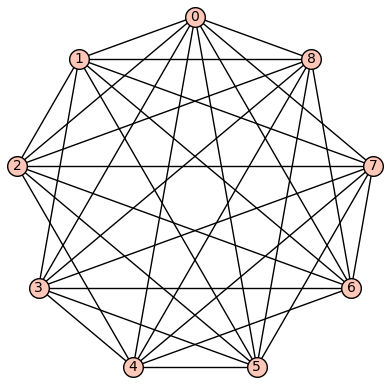

(None, 4, 8)

In [39]:
hill_climbing(2, 7, 9)

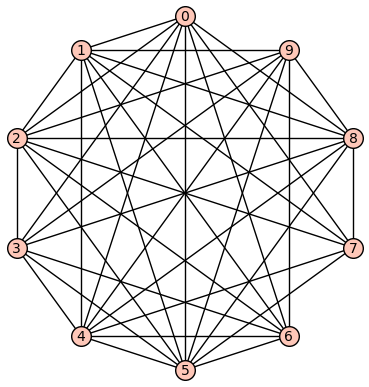

(None, 4, 7)

In [40]:
hill_climbing(2, 7, 10)

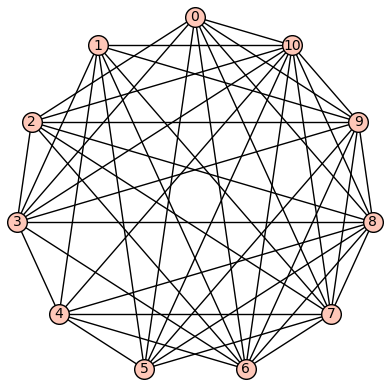

(None, 4, 7)

In [41]:
hill_climbing(2, 7, 11)

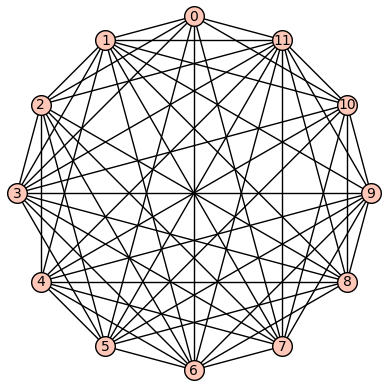

(None, 5, 7)

In [42]:
hill_climbing(2, 7, 12)

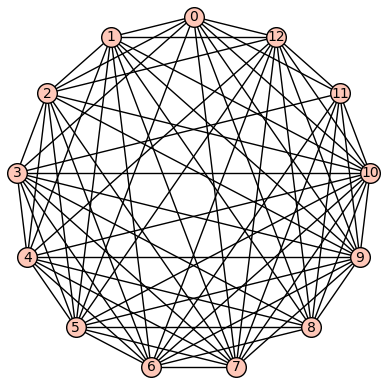

(None, 5, 9)

In [43]:
hill_climbing(2, 7, 13)

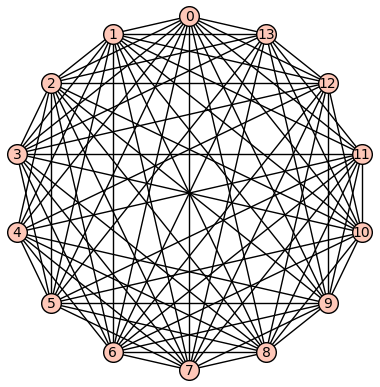

(None, 6, 9)

In [44]:
hill_climbing(2, 7, 14)

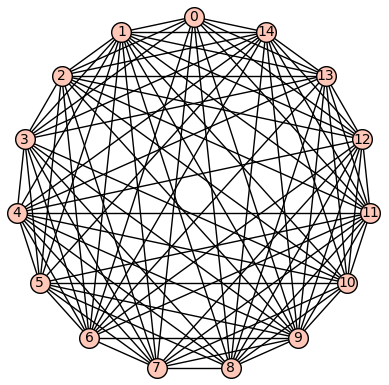

(None, 6, 9)

In [45]:
hill_climbing(2, 7, 15)

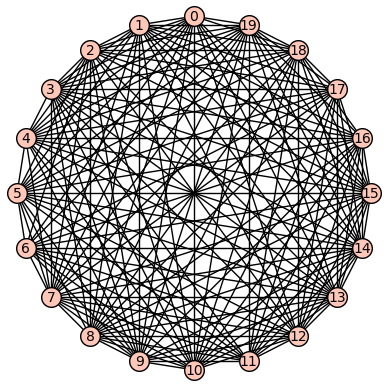

(None, 7, 10)

In [46]:
hill_climbing(2, 7, 20)

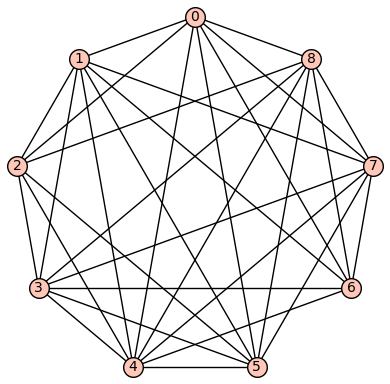

(None, 4, 8)

In [47]:
hill_climbing(2, 8, 9)

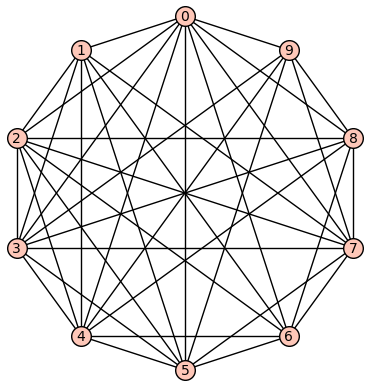

(None, 4, 8)

In [48]:
hill_climbing(2, 8, 10)

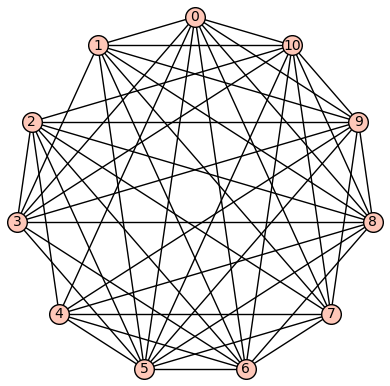

(None, 4, 8)

In [49]:
hill_climbing(2, 8, 11)

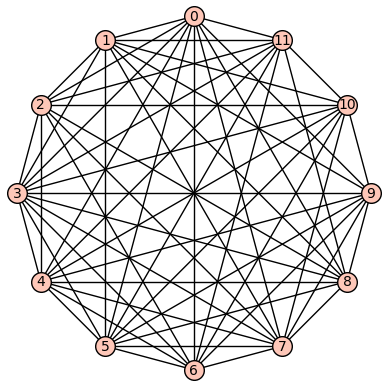

(None, 5, 8)

In [50]:
hill_climbing(2, 8, 12)

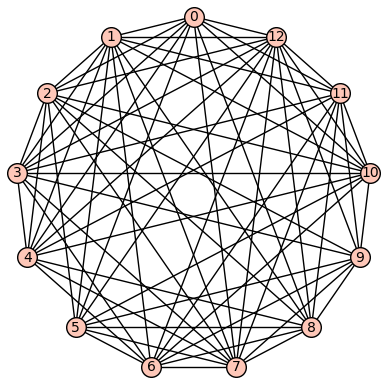

(None, 5, 8)

In [51]:
hill_climbing(2, 8, 13)

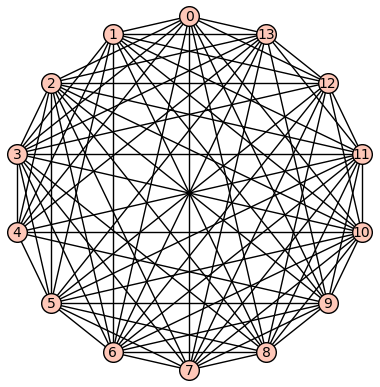

(None, 5, 9)

In [52]:
hill_climbing(2, 8, 14)

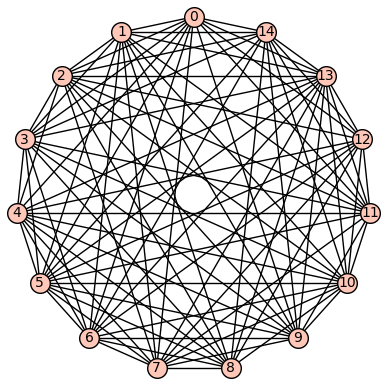

(None, 6, 8)

In [53]:
hill_climbing(2, 8, 15)

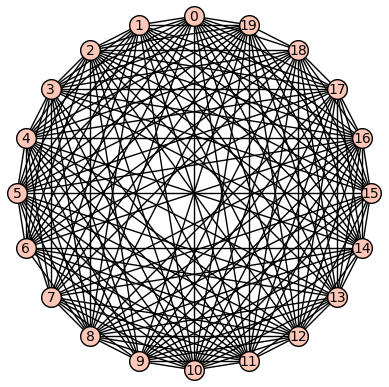

(None, 7, 12)

In [54]:
hill_climbing(2, 8, 20)